In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
pip install -U sciket-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sciket-learn (from versions: none)
ERROR: No matching distribution found for sciket-learn

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


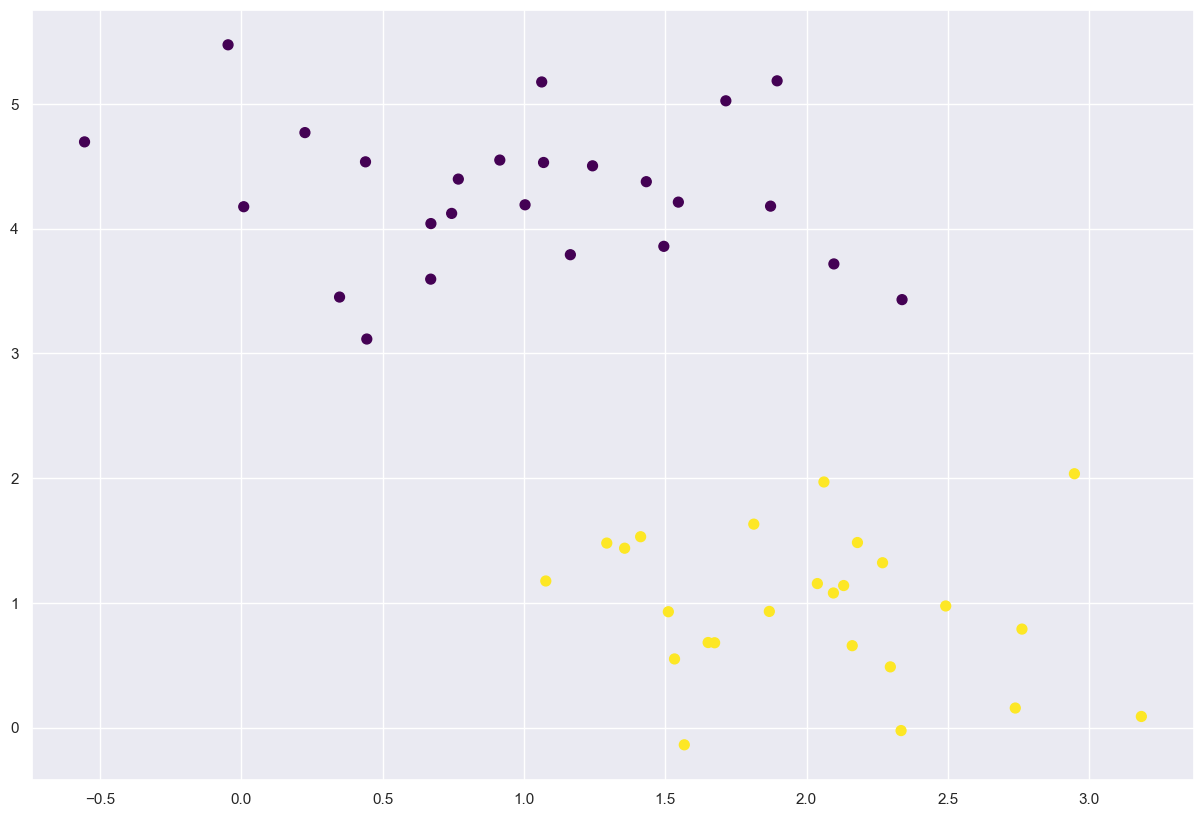

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# Correctly plot the scatter plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis')
plt.show()


(-1.0, 3.5)

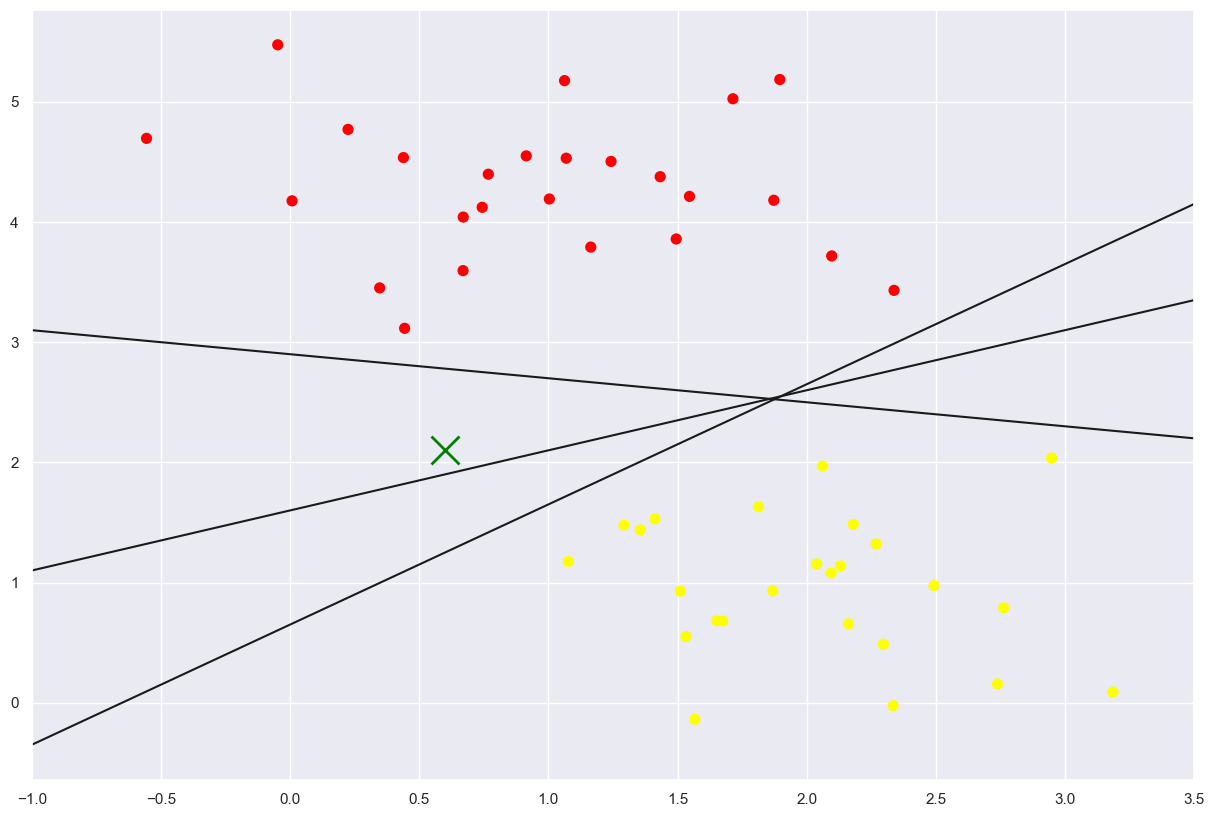

In [9]:
xfit = np.linspace(-1, 3.5, num=50)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='green', markeredgewidth=2, markersize=20)

for m,c in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + c, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

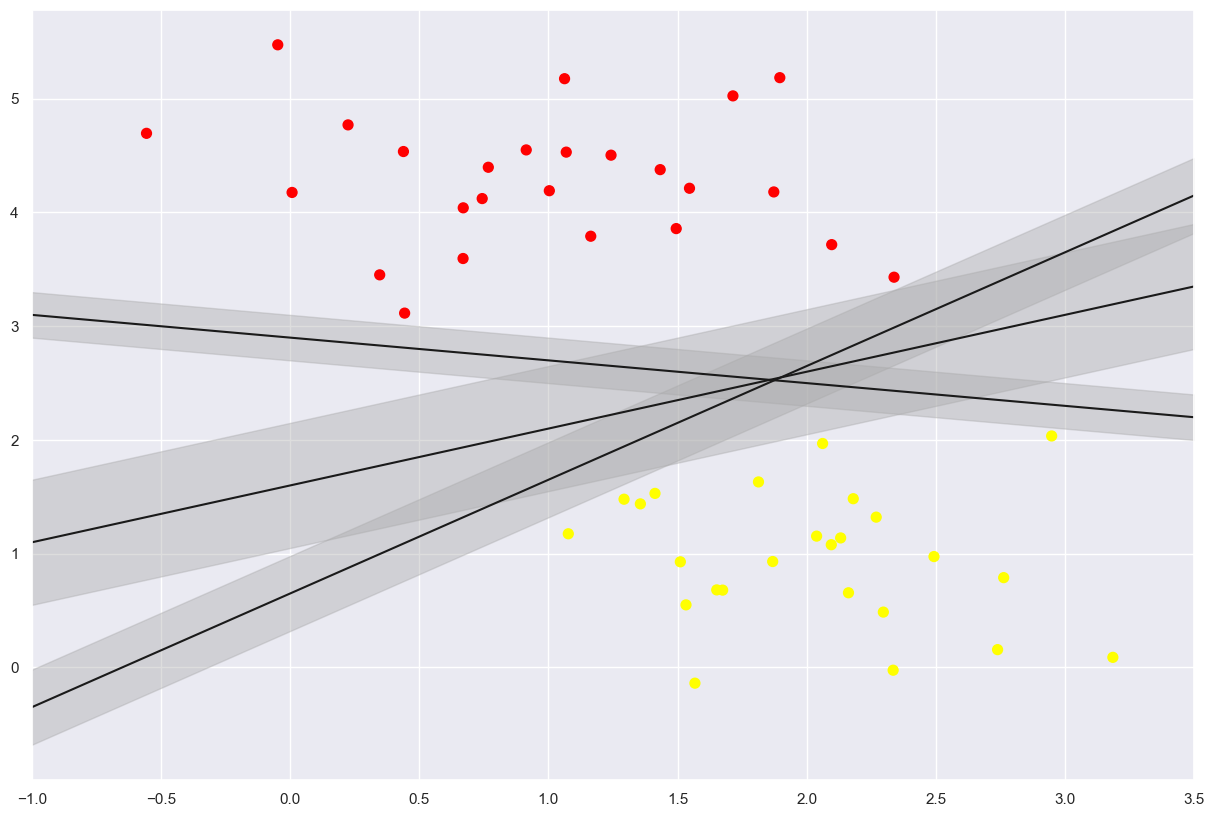

In [8]:
xfit = np.linspace(-1, 3.5, num=50)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

for m,c,d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + c
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color="#AAAAAB", alpha=0.4)

plt.xlim(-1, 3.5)

In [21]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

SVC(C=10000000000.0, kernel='linear')

In [25]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)

    y, x = np.meshgrid(y, x)
    xy = np.vstack([x.ravel(), y.ravel()]).T
    p = model.decision_function(xy).reshape(x.shape)

    ax.contour(x, y, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, marker='o', linewidth=1, facecolors='none'
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

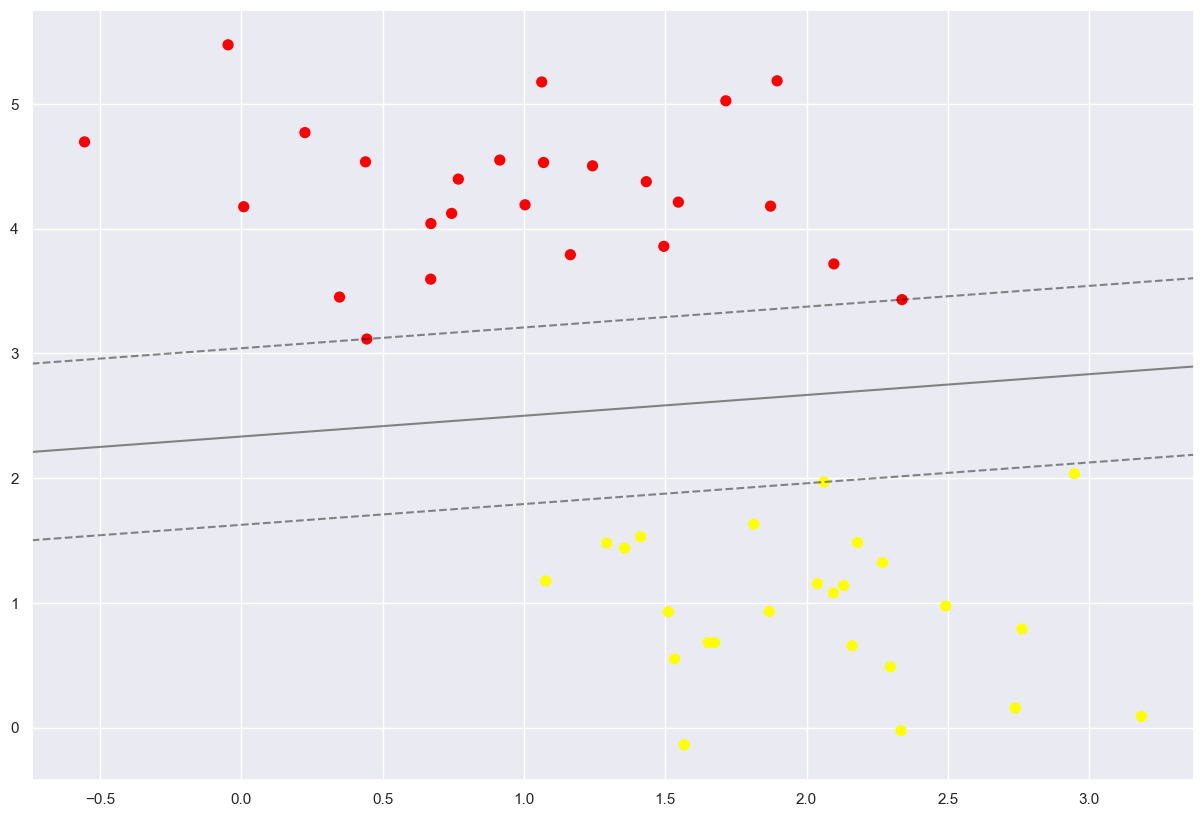

In [27]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)